### Задание

1. Возьмите датасет с цветками ириса (функция `load_iris` из библиотеки `sklearn`)
2. Оставьте два признака - `sepal_length` и `sepal_width` и целевую переменную - `variety`
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - `sepal_length` и `sepal_width`
7. Подберите оптимальное число кластеров для алгоритма `kmeans` и визуализируйте полученную кластеризацию

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [59]:
# Загрузим датасет Iris
iris = load_iris()

In [60]:
# Составим датафрейм из необходимых данных
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['variety'] = iris.target
df = df[['sepal length (cm)', 'sepal width (cm)', 'variety']]
df

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [87]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(df[['sepal length (cm)', \
                                                        'sepal width (cm)']], df['variety'], \
                                                        random_state=108)

In [62]:
# Построим модель LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [63]:
# Сделаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

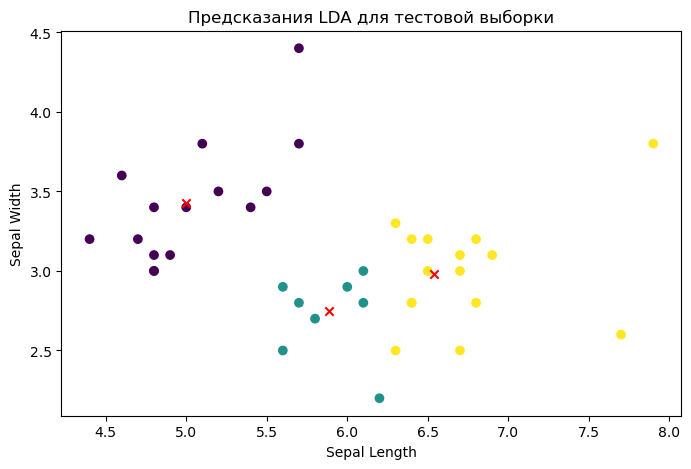

In [73]:
# Визуализируем предсказания для тестовой выборки и центры классов
plt.figure(figsize=(8, 5))
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_pred)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='red', marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Предсказания LDA для тестовой выборки')
plt.show()

In [65]:
# Отбросим целевую переменную и оставим только два признака - sepal_length и sepal_width
X = df[['sepal length (cm)', 'sepal width (cm)']]

In [92]:
# Подберем оптимальное число кластеров для алгоритма k-means, используя метод локтя
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=108)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

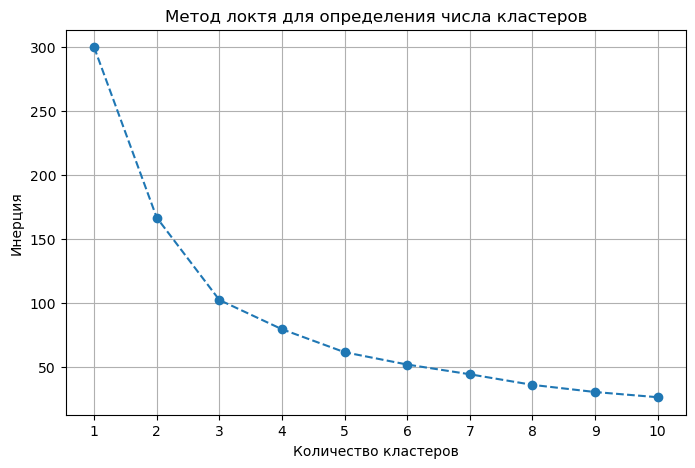

In [84]:
# Визуализируем метод локтя
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xticks(range(1, 11))
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения числа кластеров')
plt.grid()
plt.show()

# Из графика видно, что оптимальное число кластеров равно 3

In [89]:
# Выполним кластеризацию с оптимальным числом кластеров
kmeans = KMeans(n_clusters=3, random_state=108)
kmeans.fit(X_scaled)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=108)

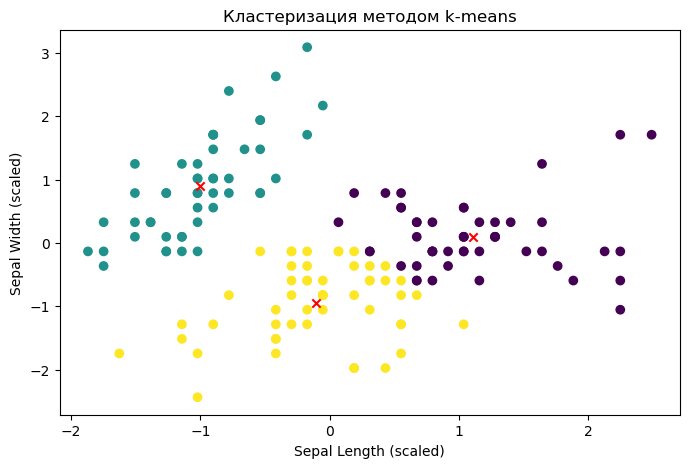

In [90]:
# Визуализируем кластеризацию
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Кластеризация методом k-means')
plt.show()